# Introduction to Image Classification

The great thing about the Machine Learning techniques you have been learning is that they can be applied to most forms of data. So far you have done classification on tabular data (the iris dataset) and on text data (the mbti dataset). In this test you will use the same techiques learnt there and apply it to image classification.

## Honour Code
I Nqobile, Shabangu, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

## Imports

In [2]:
import numpy as np
import gzip # This is used in extracting the images

import matplotlib.pyplot as plt # in order to plot the images to see what we are dealing with
from sklearn.ensemble import RandomForestClassifier # you'll be using Random Forest to classify the images
from sklearn.metrics import accuracy_score # sklearn's way of measuring accuracy
from sklearn.metrics import classification_report 

## The Dataset

The dataset we will be using is called MNIST. This is a large dataset of handdrawn digits 0-9 and is a good dataset to learn image classification on as it requires little to no preprocessing.

The dataset can be downloaded from [The MNIST Database](http://yann.lecun.com/exdb/mnist/). Download all four files. These files are the images and their respective labels and the dataset has already been split into a train and a test set.

Once you've downloaded the data, make sure that the data is in the same folder as this Jupyter Notebook, and then lets begin! 

These files are compressed as gzip. The following two functions will extract the data for you. ** Don't change this code. **

In [3]:
def extract_data(filename, num_images, IMAGE_WIDTH):
    """Extract the images into a 4D tensor [image index, y, x, channels]."""
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    """Extract the labels into a vector of int64 label IDs."""
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

## Question 1 - Extracting the data

The MNIST dataset consists for 60 000 training images and 10 000 testing images. This is a lot of data! Let's not extract all of that right now. Create a function get_data that uses the above functions to extract a certain number of images and their labels from the gzip files.

The function will take as input two integer values and return four variables in the form of `(X_train, y_train), (X_test, y_test)`, where `(X_train, y_train)` are the extracted images / labels of the training set, and `(X-test, y_test)` are the extracted images / labels of the testing set.

Image pixel values range from 0-255. Normalise the image pixels so that they are in the range 0-1.

_**Function Specifications:**_
* Should take two integers as input, one representing the number of training images, and the other the number of testing images.
* Should return two `tuples` of the form `(X_train, y_train), (X_test, y_test)`.

_**Note**_ that the size of the MNIST images are 28x28

Usually when setting up your dataset, it is a good idea to randomly shuffle your data in case your data is ordered. Think of this as shuffle a pack of cards. Here however we aren't going to shuffle the data so that all our answers are the same.

In [17]:
def get_data(num_train_images,num_test_images):
    
    X_train = extract_data('train-images-idx3-ubyte.gz', num_train_images, 28)
    y_train = extract_labels('train-labels-idx1-ubyte.gz', num_train_images)
    X_te = extract_data('t10k-images-idx3-ubyte.gz', num_test_images, 28)
    y_test = extract_labels('t10k-labels-idx1-ubyte.gz', num_test_images)
    
    #X_train = (X_tr-np.min(X_tr))/(np.max(X_tr)-np.min(X_tr))
    X_test = (X_te-np.min(X_te))/(np.max(X_te)-np.min(X_te))
    
    return (X_train, y_train), (X_test, y_test)

In [18]:
(X_train, y_train), (X_test, y_test) = get_data(5000,1000)
## Print off the shape of these arrays to see what we are dealing with
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(5000,)
(1000,)
(5000, 784)
(1000, 784)


** Expected Output **
```python
(X_train, y_train), (X_test, y_test) = get_data(5000,1000)
## Print off the shape of these arrays to see what we are dealing with
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(5000,)
(1000,)
(5000, 784)
(1000, 784)
```

In [6]:
X_train[1, 399]

0.7764706

In [7]:
y_test[20]

9

In [19]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Plotting the Data

Lets see what this data looks like! Right now the images are "flattened" into a 1-D array of length 784. In order to plot the image we first need to reshape it to the correct size of 28x28. We'll print out the respective label to make sure we are plotting the right number.

Label:  4


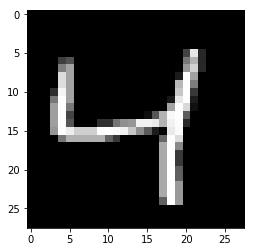

In [15]:
image_index = 2 ## Change me to view different images

print("Label: ", y_train[image_index])
reshaped_image = X_train[image_index].reshape((28, 28))

plt.imshow(reshaped_image, cmap='gray')
plt.show()

## Question 2 - Training the Model

Now that we have formatted our data, we can fit a model using sklearn's `RandomForestClassifier` class with its default parameters and its random_state is set to 0. We'll write a function that will take as input the image and label variables that we created previously, and return a trained model.

_**Function Specifications:**_
* Should take two numpy `arrays` as input in the form `(X_train, y_train)`.
* Should return an sklearn `RandomForestClassifier` model which has a random state of 0.
* The returned model should be fitted to the data.

In [16]:
def train_model(X_train, y_train):
    rf = RandomForestClassifier(random_state = 0)
    fitt = rf.fit(X_train, y_train)
    return fitt

In [17]:
clf = train_model(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Question 3 - Testing the model

Now that you have trained your model, lets see how well it does on the test set. Write a function which returns the accuracy of your trained model when tested with the test set.

_**Function Specifications:**_
* Should take the fitted model and two numpy `arrays` `X_test, y_test` as input.
* Should return a `float` of the accuracy of the model. This number should be between zero and one.

In [18]:
def calculate_accuracy(clf, X_test, y_test):
    
    pred = clf.predict(X_test)
    
    acc = np.mean(pred == y_test)
    return acc

In [19]:
print(calculate_accuracy(clf,X_test,y_test))

0.861


Classification reports gives us more information on where our model is going wrong - looking specifically at the performance caused by Type I & II errors. Write a function which returns the classification report of your test set.

_**Function Specifications:**_
* Should take the fitted model and two numpy `arrays` `X_test, y_test` as input.
* Should return a classification report

_**Hint**_ You don't need to do this manually, sklearn has a classification report function.

In [20]:
def get_class_report(clf, X_test, y_test):
    clsf = classification_report(clf.predict(X_test), y_test)
    return clsf

In [21]:
print(get_class_report(clf,X_test,y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.90        96
           1       0.99      0.95      0.97       132
           2       0.84      0.89      0.87       110
           3       0.78      0.88      0.83        94
           4       0.88      0.87      0.87       112
           5       0.77      0.75      0.76        89
           6       0.86      0.91      0.89        82
           7       0.87      0.87      0.87        99
           8       0.75      0.79      0.77        85
           9       0.87      0.81      0.84       101

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



## Plotting the results

Lets actually see if your model has trained correctly. Lets plot some of the images with their predicted labels. Since we don't have the predictions stored in our notebooks memory, we need to call the predict function here first.

Predicted Label:  9


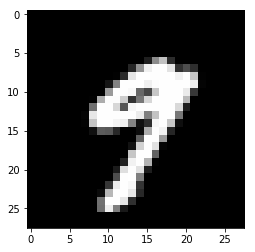

In [23]:
preds = clf.predict(X_test)

image_index = 20 ## Change me to see other predictions

print("Predicted Label: ",preds[image_index])
plt.imshow(X_test[image_index].reshape((28, 28)), cmap='gray')
plt.show()

Nice work! Since we didn't use all the data in the beginning, there is a chance our performance can improve. Go change the amount of data we use to see how it affects the accuracy of your model.